# Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv("activity_km_07_01.csv")
df.head()

,PH,cahaya,intensitas air,suhu,PPM,tinggi air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa


### Mengganti nama kolom yang menggunakan spasi

In [3]:
df.columns = df.columns.str.replace(" ","_")
df.head()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.5,Ada,Tinggi,27.1,345.0,12000,Tidak melakukan apa-apa
4,6.2,NaN,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa


### Cek Missing Values

In [4]:
df.shape

(616, 7)

In [5]:
print("Total Rows           : ", df.shape[0])
print("Total Cols           : ", df.shape[1])
print("Total Missing Values : ", df.isnull().sum().sum())

Total Rows           :  616
Total Cols           :  7
Total Missing Values :  74


In [6]:
pd.DataFrame({
    'Missing_values': df.isnull().sum(),
    'Persentase_missing_values (%)': (df.isnull().sum()/len(df))*100
})

,Missing_values,Persentase_missing_values (%)
PH,16,2.597403
cahaya,26,4.220779
intensitas_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
tinggi_air,0,0.000000
aksi,0,0.000000


### cek value target 

In [7]:
df.aksi.value_counts().to_frame()

,aksi
Tidak melakukan apa-apa,473
Hidupkan Lampu,92
Hidupkan Lampu dan Pompa nutrisi TDS,39
Hidupkan Pompa nutrisi TDS,12


# Handle Missing Value 

In [8]:
miss = pd.DataFrame({
    'Missing_values': df.isnull().sum(),
    'Persentase_missing_values (%)': (df.isnull().sum()/len(df))*100
})
miss

,Missing_values,Persentase_missing_values (%)
PH,16,2.597403
cahaya,26,4.220779
intensitas_air,0,0.000000
suhu,27,4.383117
PPM,5,0.811688
tinggi_air,0,0.000000
aksi,0,0.000000


### Suhu

In [9]:
mean_temp = float(df.suhu.mean())
mean_temp

29.36400679117148

In [10]:
df.suhu.fillna(value=mean_temp, inplace=True)

###  cahaya

In [11]:
mode_light = df.cahaya.mode()[0]
mode_light

'Ada'

In [12]:
df.cahaya.fillna(value=mode_light, inplace=True)

### PH

In [13]:
mean_ph = float(df.PH.mean())
mean_ph

6.655166666666665

In [14]:
df.PH.fillna(value=mean_ph, inplace=True)

### PPM

In [15]:
mean_ppm = float(df.PPM.mean())
mean_ppm

1032.836333878887

In [16]:
df.PPM.fillna(value=mean_ppm, inplace=True)

In [17]:
miss = pd.DataFrame({
    'Missing_values': df.isnull().sum(),
    'Persentase_missing_values (%)': (df.isnull().sum()/len(df))*100
})
miss

,Missing_values,Persentase_missing_values (%)
PH,0,0.0
cahaya,0,0.0
intensitas_air,0,0.0
suhu,0,0.0
PPM,0,0.0
tinggi_air,0,0.0
aksi,0,0.0


# Handle & detect outliers

In [18]:
num_cols = np.array(['PH', 'suhu', 'PPM', 'tinggi_air']).reshape(2,2)

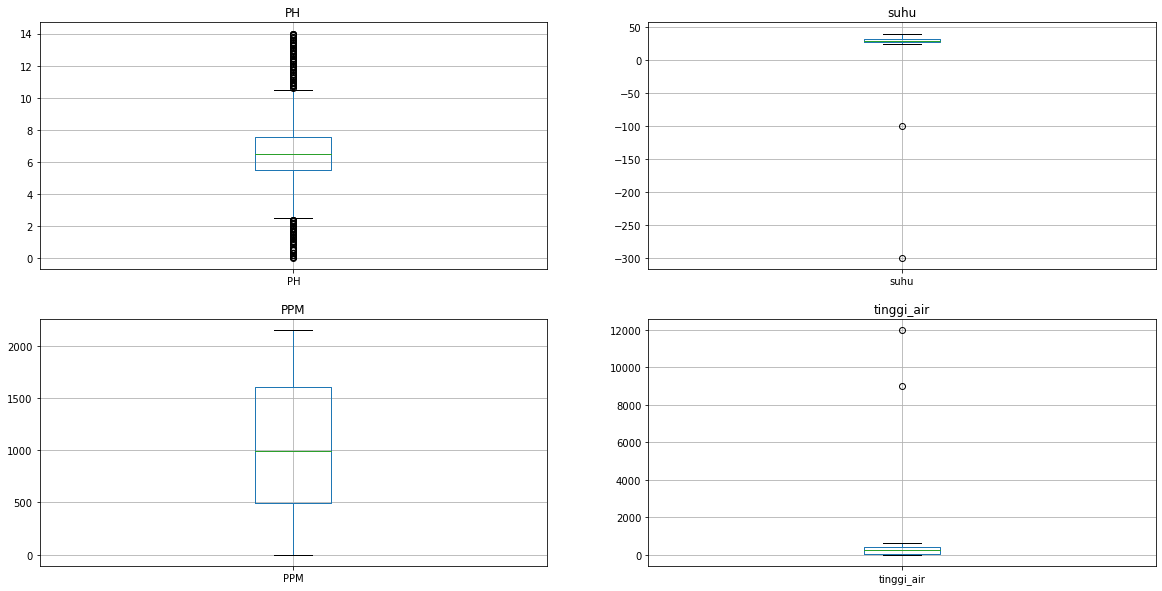

In [19]:
nrows=2
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))
for i in range(nrows):
    for j in range(ncols):
        ax[i][j].set_title(num_cols[i][j])
        df[[num_cols[i][j]]].boxplot(ax=ax[i][j])
plt.show()

### Suhu

`ambil nilai suhu yang lebih dari nol saja`

In [20]:
df[df.suhu < 0]

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
109,5.7,Tidak ada,Cukup,-300.0,1991.0,624,Tidak melakukan apa-apa
118,5.9,Tidak ada,Cukup,-100.0,1443.0,401,Tidak melakukan apa-apa


In [21]:
df = df[df.suhu > 0]

### Tinggi air

In [22]:
df[df.tinggi_air < 8000]['tinggi_air'].max()

629

`ambil nilai dibawah 700`

In [23]:
df = df[df.tinggi_air < 700]

### Visualisasi kembali

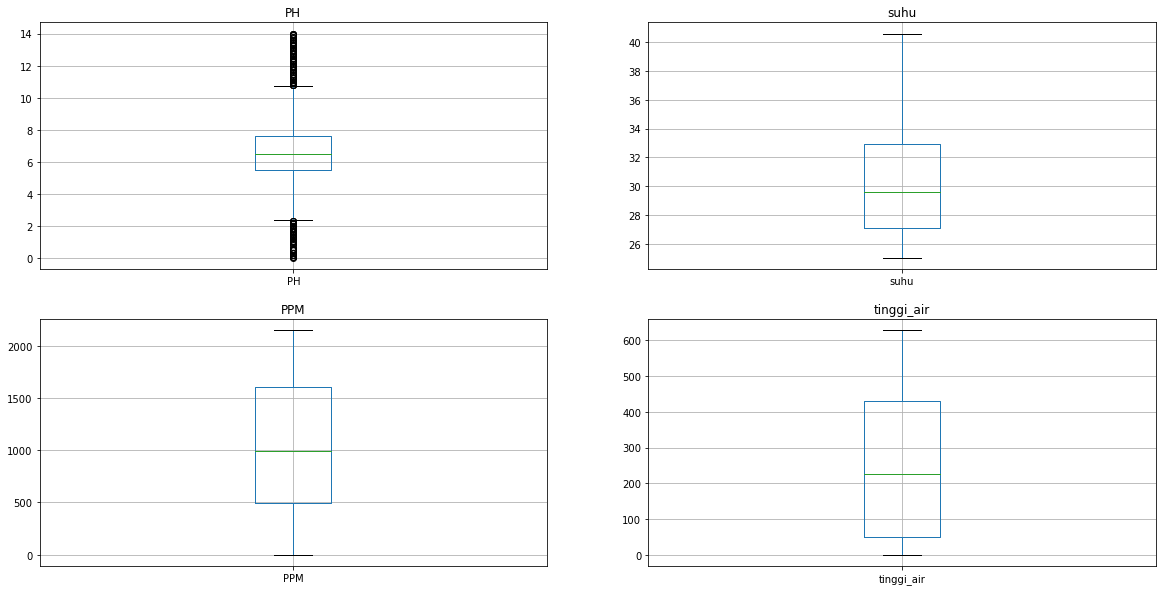

In [24]:
nrows=2
ncols=2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))
for i in range(nrows):
    for j in range(ncols):
        ax[i][j].set_title(num_cols[i][j])
        df[[num_cols[i][j]]].boxplot(ax=ax[i][j])
plt.show()

`Pada feature PH kami menganggap nilainya bukan pencilan karena masih dalam rentan nilai PH (1-14)`

# Cek Imbalance data

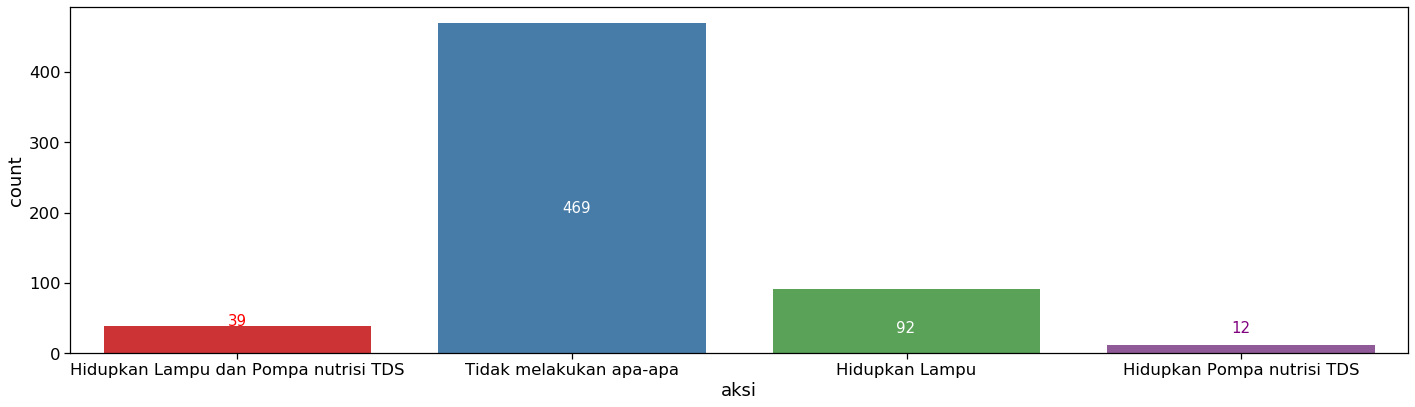

In [25]:
plt.figure(figsize=(20,6))
sns.set_context('notebook', font_scale=1.5)
sns.countplot('aksi',data=df, palette="Set1")
plt.annotate(''+str(df['aksi'][df['aksi']=='Hidupkan Lampu dan Pompa nutrisi TDS'].count()), xy=(-0.2, 250), xytext=(-0.03, 40), size=15, color='r')
plt.annotate(''+str(df['aksi'][df['aksi']=='Tidak melakukan apa-apa'].count()), xy=(-0.2, 100), xytext=(0.97, 200), size=15, color='w')
plt.annotate(''+str(df['aksi'][df['aksi']=='Hidupkan Lampu'].count()), xy=(-0.2, 100), xytext=(1.97, 30), size=15, color='w')
plt.annotate(''+str(df['aksi'][df['aksi']=='Hidupkan Pompa nutrisi TDS'].count()), xy=(-0.2, 100), xytext=(2.97, 30), size=15, color='purple')
plt.tight_layout()
plt.show()

In [26]:
df.intensitas_air.unique()

array(['Tinggi', 'Cukup', 'Rendah', 'Rendah sekali'], dtype=object)

# Encoding

In [27]:
df_backup = df.copy(deep=True)

In [28]:
#applymap dengan dict untuk label encoding
mapping = {'Rendah sekali': 1,
           'Rendah': 2,
           'Cukup': 3,
           'Tinggi': 4}
df.intensitas_air = df[['intensitas_air']].applymap(mapping.get)

In [29]:
# # one hot encoding cahaya
# cahaya = pd.get_dummies(df.cahaya, prefix='cahaya_')
# df = pd.concat([df, cahaya], axis=1)
# df.drop(columns='cahaya', inplace=True)
# df.head()

In [30]:
df.cahaya.unique()

array(['Ada', 'Tidak ada'], dtype=object)

In [31]:
#applymap dengan dict untuk label encoding
mapping2 = {'Tidak ada': 0,
           'Ada': 1}
df.cahaya = df[['cahaya']].applymap(mapping2.get)

In [32]:
#applymap dengan dict untuk label encoding
mapping3 = {'Tidak melakukan apa-apa': 1,
           'Hidupkan Lampu': 2,
           'Hidupkan Pompa nutrisi TDS': 3,
           'Hidupkan Lampu dan Pompa nutrisi TDS': 4}
df.aksi = df[['aksi']].applymap(mapping3.get)
df.head()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1,4,27.0,188.0,622,4
1,5.7,1,4,26.9,79.0,557,4
2,6.0,1,4,27.0,11.0,491,4
4,6.2,1,4,27.1,602.0,444,1
5,6.1,1,4,27.0,561.0,405,2


In [33]:
df.corr()['aksi'].to_frame()

,aksi
PH,0.104946
cahaya,0.341421
intensitas_air,-0.045024
suhu,-0.530751
PPM,-0.271730
tinggi_air,0.098685
aksi,1.000000


In [34]:
X = df.drop(columns="aksi")
y = df.aksi

# Handle dengan SMOTE

In [35]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (612, 6)
Shape of X after SMOTE: (1876, 6)

Balance of positive and negative classes (%):


4    25.0
3    25.0
2    25.0
1    25.0
Name: aksi, dtype: float64

# Visualize

In [36]:
df_smote = pd.concat([X_sm, y_sm], axis=1)
df_smote.head()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1,4,27.0,188.0,622,4
1,5.7,1,4,26.9,79.0,557,4
2,6.0,1,4,27.0,11.0,491,4
3,6.2,1,4,27.1,602.0,444,1
4,6.1,1,4,27.0,561.0,405,2


In [37]:
df[df['aksi'] == 4].shape

(39, 7)

In [38]:
df_smote[df_smote['aksi'] == 4].shape

(469, 7)

### Swap numeric menjadi kategoric lagi untuk visualisasi

In [39]:
{value: key for key, value in mapping2.items()}

{0: 'Tidak ada', 1: 'Ada'}

In [40]:
df_smote['intensitas_air'] = df_smote[['intensitas_air']].applymap({value: key for key, value in mapping.items()}.get)
df_smote['cahaya'] = df_smote[['cahaya']].applymap({value: key for key, value in mapping2.items()}.get)
df_smote['aksi'] = df_smote[['aksi']].applymap({value: key for key, value in mapping3.items()}.get)
df_smote.head()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,Ada,Tinggi,27.0,188.0,622,Hidupkan Lampu dan Pompa nutrisi TDS
1,5.7,Ada,Tinggi,26.9,79.0,557,Hidupkan Lampu dan Pompa nutrisi TDS
2,6.0,Ada,Tinggi,27.0,11.0,491,Hidupkan Lampu dan Pompa nutrisi TDS
3,6.2,Ada,Tinggi,27.1,602.0,444,Tidak melakukan apa-apa
4,6.1,Ada,Tinggi,27.0,561.0,405,Hidupkan Lampu


In [41]:
df_smote.intensitas_air.unique()

array(['Tinggi', 'Cukup', 'Rendah', 'Rendah sekali'], dtype=object)

### PH 

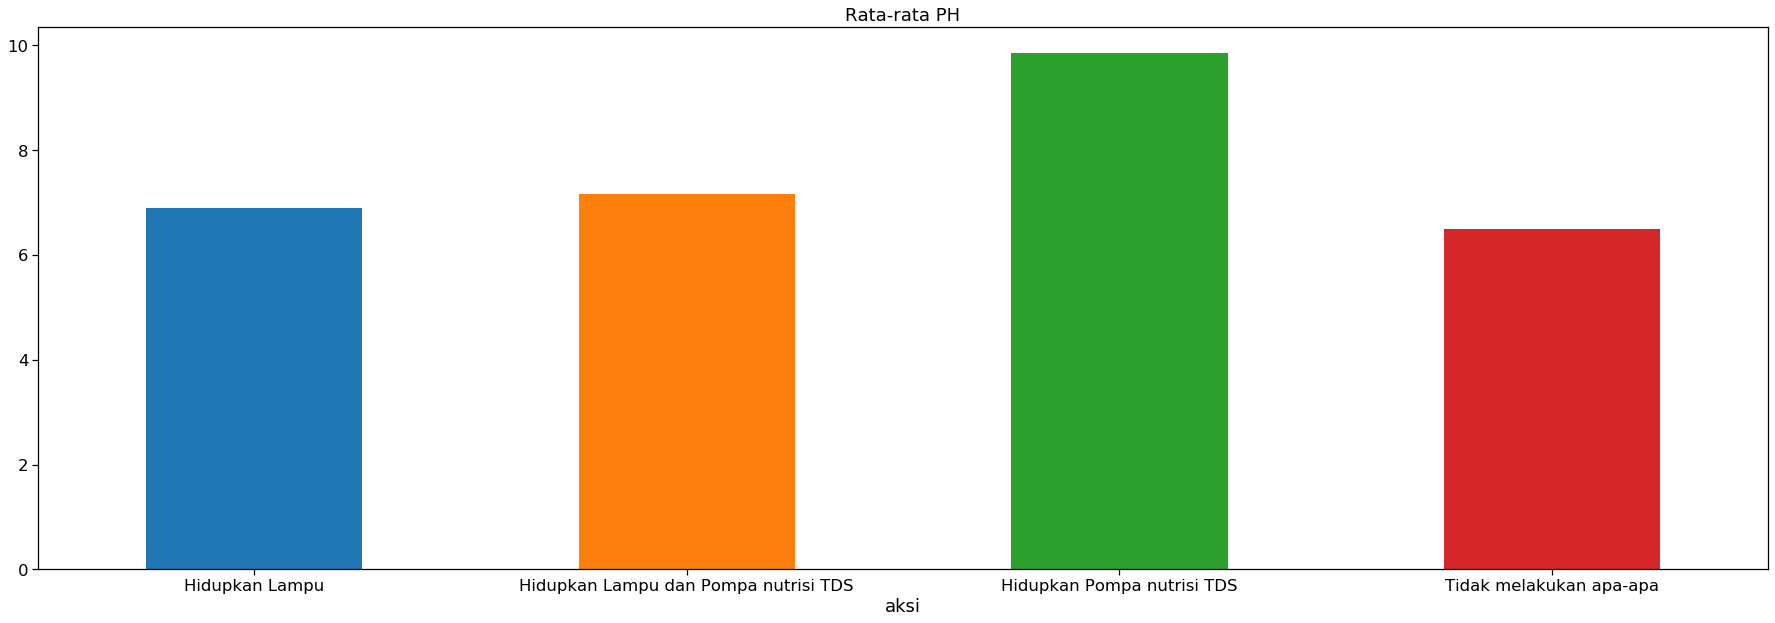

In [42]:
import matplotlib.colors as mcolors
plt.figure(figsize=(25,9))
df_smote.groupby('aksi')['PH'].mean().plot(kind='bar',color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
plt.xticks(rotation=0)
plt.title("Rata-rata PH")
plt.tight_layout()
plt.show()

In [43]:
ph_aksi = df_smote.groupby('aksi')['PH'].mean().reset_index()
ph_aksi

,aksi,PH
0,Hidupkan Lampu,6.895240
1,Hidupkan Lampu dan Pompa nutrisi TDS,7.169823
2,Hidupkan Pompa nutrisi TDS,9.863474
3,Tidak melakukan apa-apa,6.488714


In [44]:
ph_aksi.iloc[0]['PH']

6.895239500080177

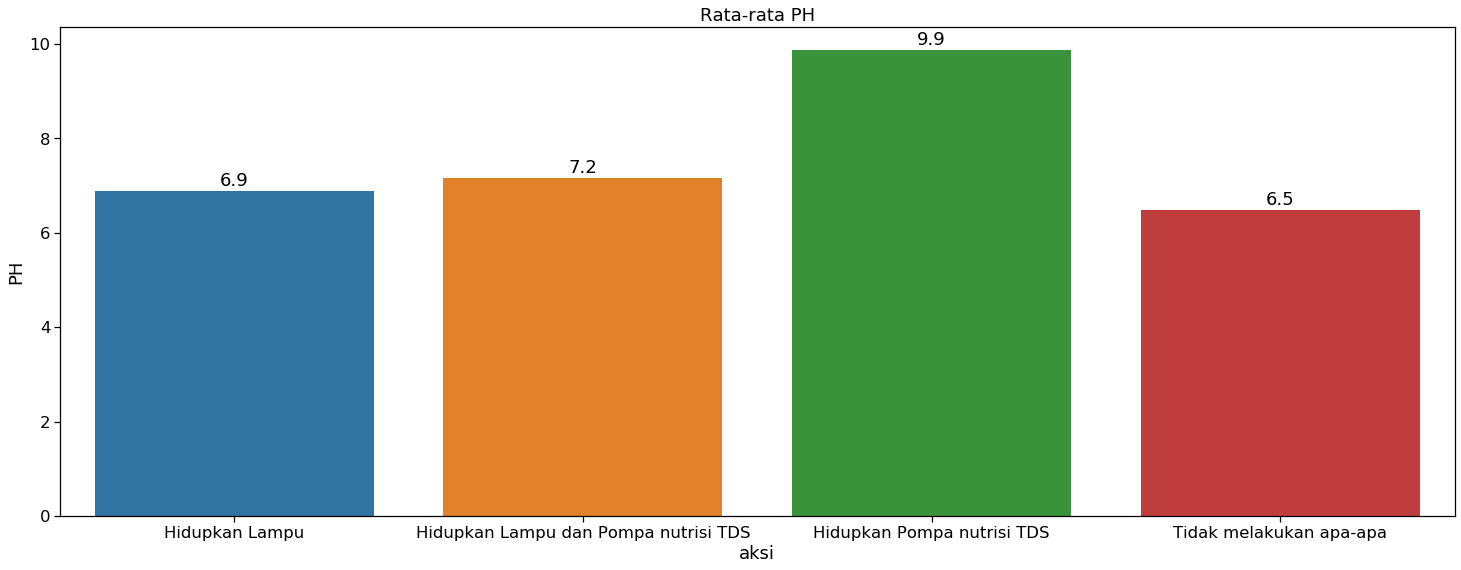

In [45]:
plt.figure(figsize=(25,9))
splot = sns.barplot(x='aksi', y='PH', data=ph_aksi)
plt.title("Rata-rata PH")
# plt.annotate(str(ph_aksi.iloc[0]['PH']), xy=(-0.4, 2), xytext=(-0.29, 2), size=20, color='w')
# plt.annotate(str(ph_aksi.iloc[1]['PH']), xy=(0.7, 3), xytext=(0.7, 3), size=20, color='w')
# plt.annotate(str(ph_aksi.iloc[2]['PH']), xy=(1.7, 6), xytext=(1.7, 6), size=20, color='w')
# plt.annotate(str(ph_aksi.iloc[3]['PH']), xy=(1.7, 3), xytext=(2.7, 3), size=20, color='w')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


plt.show()

### Intensitas Air

In [46]:
df_smote.intensitas_air.unique()

array(['Tinggi', 'Cukup', 'Rendah', 'Rendah sekali'], dtype=object)

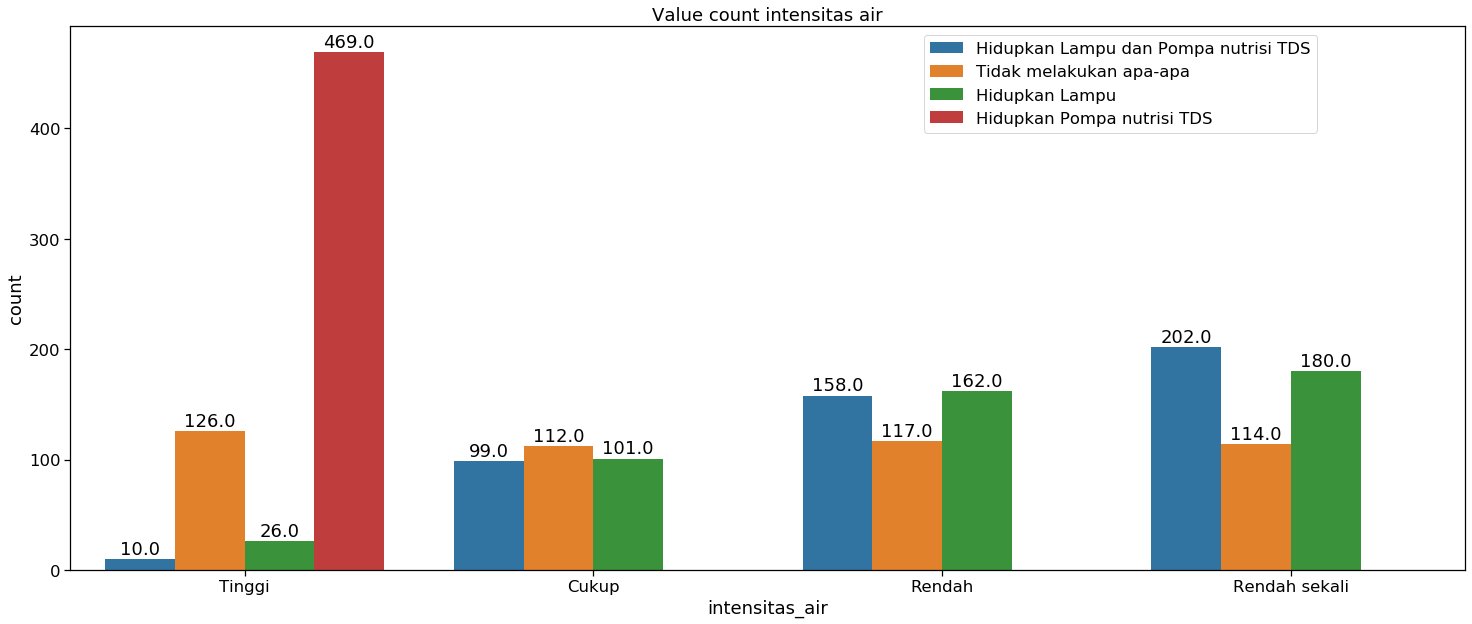

In [47]:
plt.figure(figsize=(25,10))
splot = sns.countplot(x='intensitas_air', hue='aksi', data=df_smote)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Value count intensitas air")
plt.legend(bbox_to_anchor=(0.9,1))
plt.show()

### Cahaya

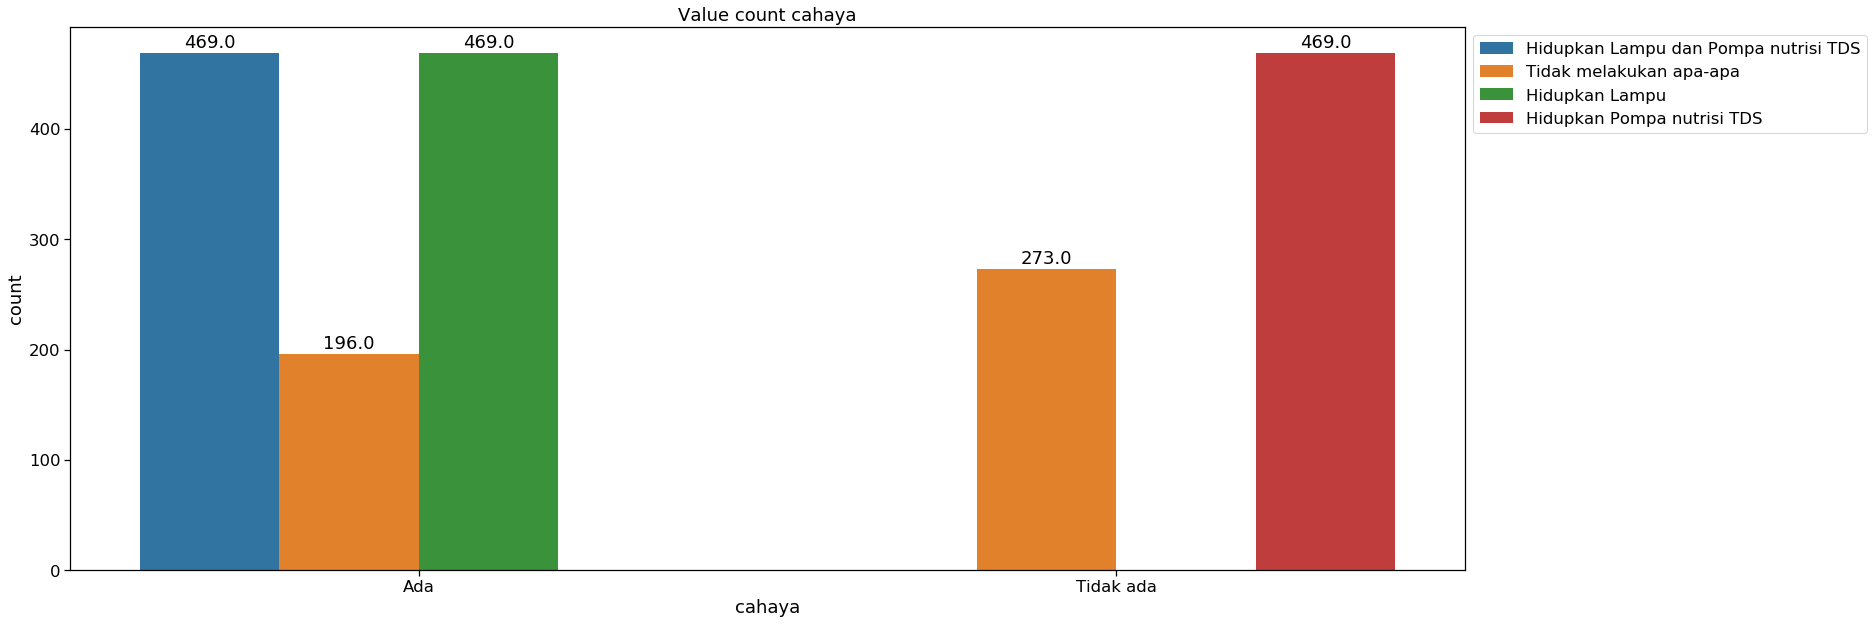

In [48]:
plt.figure(figsize=(25,10))
splot = sns.countplot(x='cahaya', hue='aksi', data=df_smote)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Value count cahaya")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Suhu

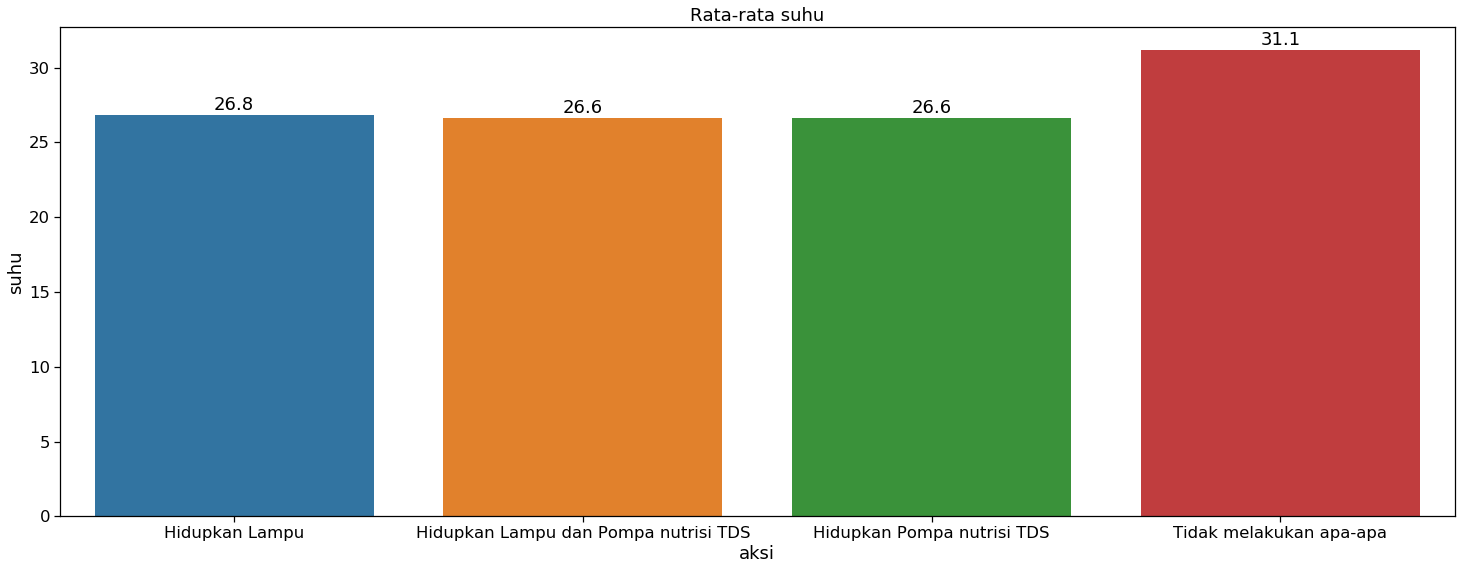

In [49]:
plt.figure(figsize=(25,9))
splot = sns.barplot(x='aksi', y='suhu', data=df_smote.groupby('aksi')['suhu'].mean().reset_index())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Rata-rata suhu")
plt.show()

### PPM

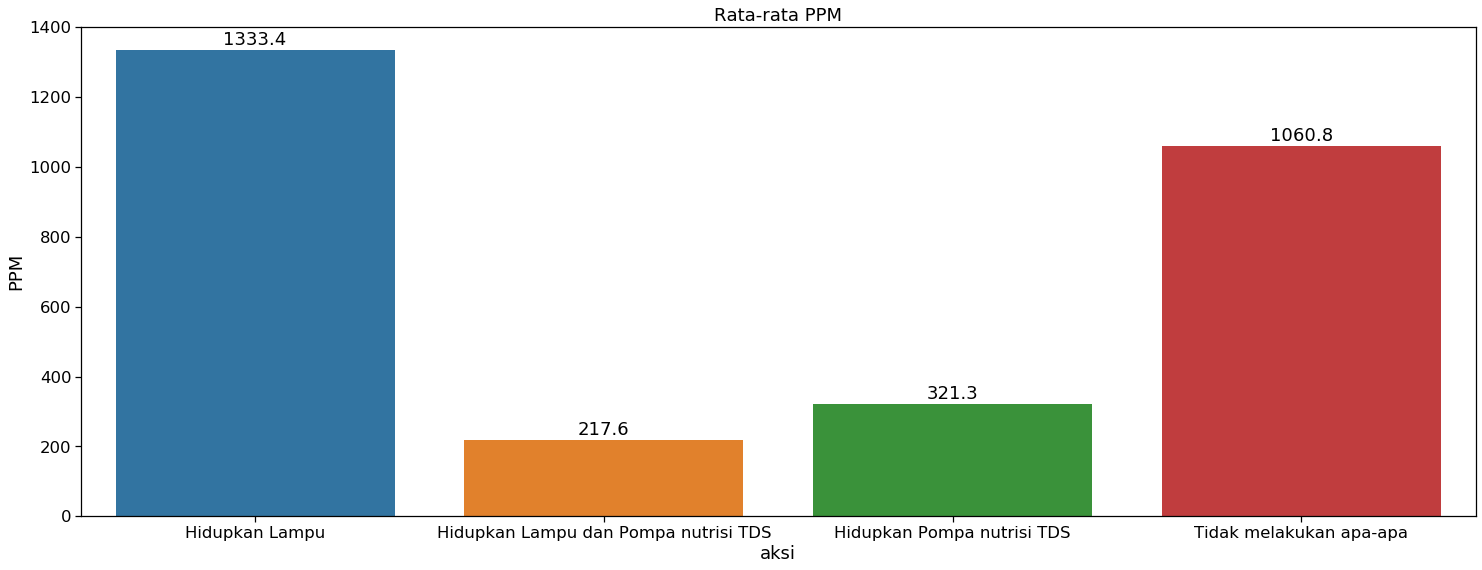

In [50]:
plt.figure(figsize=(25,9))
splot = sns.barplot(x='aksi', y='PPM', data=df_smote.groupby('aksi')['PPM'].mean().reset_index())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Rata-rata PPM")
plt.show()

### Tinggi air

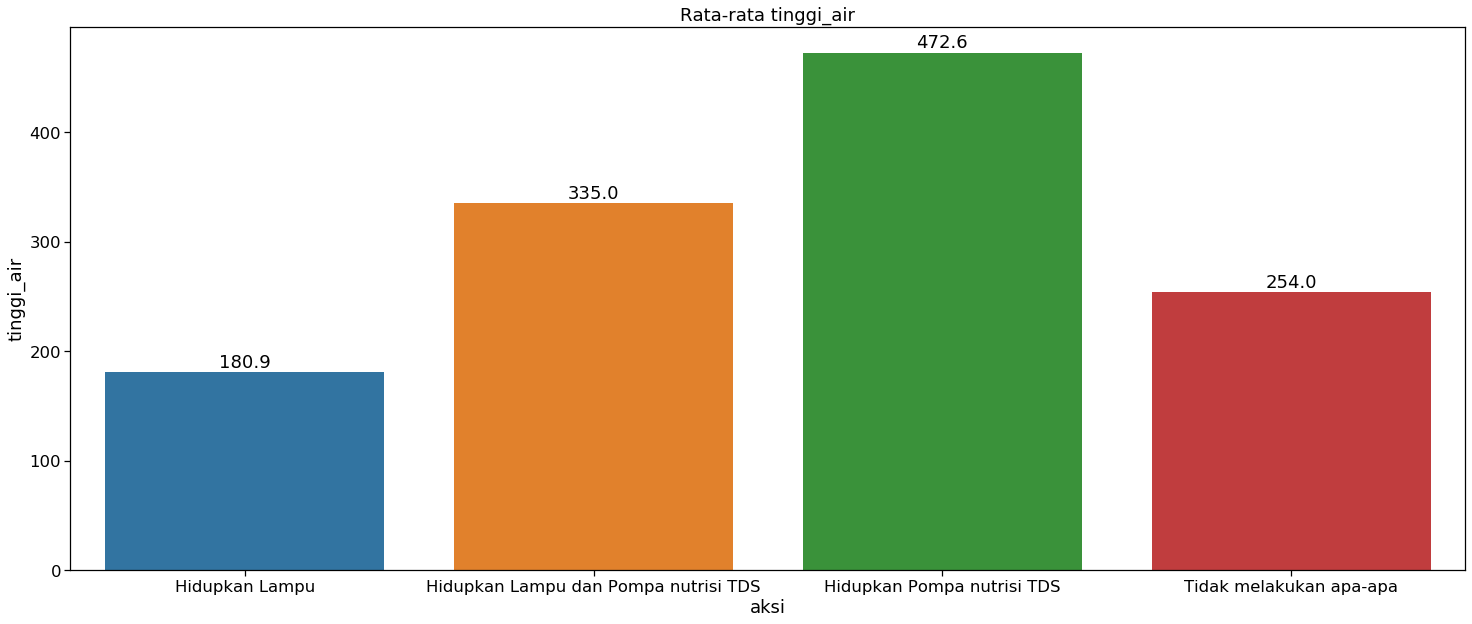

In [51]:
plt.figure(figsize=(25,10))
splot = sns.barplot(x='aksi', y='tinggi_air', data=df_smote.groupby('aksi')['tinggi_air'].mean().reset_index())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title("Rata-rata tinggi_air")
plt.show()

# Build model KNN Tanpa smote

### Encode kembali data kategorical

In [52]:
df_smote['intensitas_air'] = df_smote[['intensitas_air']].applymap(mapping.get)
df_smote['cahaya'] = df_smote[['cahaya']].applymap(mapping2.get)
df_smote['aksi'] = df_smote[['aksi']].applymap(mapping3.get)
df_smote.head()

,PH,cahaya,intensitas_air,suhu,PPM,tinggi_air,aksi
0,6.5,1,4,27.0,188.0,622,4
1,5.7,1,4,26.9,79.0,557,4
2,6.0,1,4,27.0,11.0,491,4
3,6.2,1,4,27.1,602.0,444,1
4,6.1,1,4,27.0,561.0,405,2


### Split data

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop(columns="aksi")
y = df.aksi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((489, 6), (123, 6), (489,), (123,))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [56]:
np.arange(1,50,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [57]:
params = {
    'n_neighbors':np.arange(1,50,2),
    'weights':['uniform','distance'],
    'p':[1,1.5,2]
}

### Build model with gridsearch tunning

In [58]:
df.columns

Index(['PH', 'cahaya', 'intensitas_air', 'suhu', 'PPM', 'tinggi_air', 'aksi'], dtype='object')

In [59]:
knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'n_neighbors': 17, 'p': 1, 'weights': 'distance'}
1.0 0.7730696402272249 0.7642276422764228


D:\Pemrograman\miniconda3\envs\orbit_env\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
D:\Pemrograman\miniconda3\envs\orbit_env\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, PowerTransformer, StandardScaler, OrdinalEncoder

In [61]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("tansform", PowerTransformer(method='yeo-johnson')), 
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("onehot", OneHotEncoder())
])

In [62]:
params_pipeline = {
    'algo__n_neighbors':np.arange(1,50,2),
    'algo__weights':['uniform','distance'],
    'algo__p':[1,1.5,2]
}

In [63]:
from sklearn.neighbors import KNeighborsRegressor
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, ['PH','suhu','PPM','tinggi_air']),
    ('categoric', categorical_pipeline, ['cahaya','intensitas_air']),
])
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsRegressor())
])

model = GridSearchCV(pipeline, params_pipeline, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__n_neighbors': 3, 'algo__p': 1, 'algo__weights': 'distance'}
1.0 0.7079681311514908 0.7346629288653906


`Setelah dicoba dengan transformasi yeo-johnson dan beberapa scaler, accuracy tidak meningkat`

In [64]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')), 
    ("tansform", PowerTransformer(method='yeo-johnson')), 
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("onehot", OrdinalEncoder())
])

In [65]:
params_pipeline = {
    'algo__n_neighbors':np.arange(1,50,2),
    'algo__weights':['uniform','distance'],
    'algo__p':[1,1.5,2]
}

In [66]:
from sklearn.neighbors import KNeighborsRegressor
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, ['PH','suhu','PPM','tinggi_air']),
    ('categoric', categorical_pipeline, ['cahaya','intensitas_air']),
])
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsRegressor())
])

model = GridSearchCV(pipeline, params_pipeline, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__n_neighbors': 5, 'algo__p': 1, 'algo__weights': 'distance'}
1.0 0.7311166104066722 0.7412832809992336


### Dengan Smote

In [67]:
X_smote = df_smote.drop(columns="aksi")
y_smote = df_smote.aksi

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, stratify=y_smote, random_state=42)
X_train_smote.shape, X_test_smote.shape, y_train_smote.shape, y_test_smote.shape

((1500, 6), (376, 6), (1500,), (376,))

In [68]:
knn_smote = KNeighborsClassifier()

model_smote = GridSearchCV(knn_smote, params, cv=5, n_jobs=-1, verbose=1)
model_smote.fit(X_train_smote, y_train_smote)

print(model_smote.best_params_)
print(model_smote.score(X_train_smote, y_train_smote), model_smote.best_score_, model_smote.score(X_test_smote, y_test_smote))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
1.0 0.8633333333333333 0.8723404255319149


D:\Pemrograman\miniconda3\envs\orbit_env\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
D:\Pemrograman\miniconda3\envs\orbit_env\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [69]:
params_pipeline

{'algo__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39, 41, 43, 45, 47, 49]),
 'algo__weights': ['uniform', 'distance'],
 'algo__p': [1, 1.5, 2]}

In [71]:
numerical_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('tansform', PowerTransformer()),
                ('scaler', StandardScaler())])

In [72]:
categorical_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OrdinalEncoder())])

In [70]:
from sklearn.neighbors import KNeighborsRegressor
preprocessor_smote = ColumnTransformer([
    ('numeric', numerical_pipeline, ['PH','suhu','PPM','tinggi_air']),
    ('categoric', categorical_pipeline, ['cahaya','intensitas_air']),
])
pipeline_smote = Pipeline([
    ('prep', preprocessor_smote),
    ('algo', KNeighborsRegressor())
])

model_smote = GridSearchCV(pipeline_smote, params_pipeline, cv=5, n_jobs=-1, verbose=1)
model_smote.fit(X_train_smote, y_train_smote)

print(model_smote.best_params_)
print(model_smote.score(X_train_smote, y_train_smote), model_smote.best_score_, model_smote.score(X_test_smote, y_test_smote))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__n_neighbors': 1, 'algo__p': 1, 'algo__weights': 'uniform'}
1.0 0.9049304934405846 0.9638297872340426


In [74]:
model_smote.score(X_test, y_test)

0.827247191011236

In [76]:
y_test.value_counts()

1    94
2    19
4     8
3     2
Name: aksi, dtype: int64

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
confusion_matrix(model_smote.predict(X_test_smote), y_test_smote)

array([[88,  3,  0,  0],
       [ 5, 91,  0,  0],
       [ 0,  0, 94,  0],
       [ 1,  0,  0, 94]], dtype=int64)

In [83]:
print(classification_report(model_smote.predict(X_test_smote), y_test_smote))

              precision    recall  f1-score   support

         1.0       0.94      0.97      0.95        91
         2.0       0.97      0.95      0.96        96
         3.0       1.00      1.00      1.00        94
         4.0       1.00      0.99      0.99        95

    accuracy                           0.98       376
   macro avg       0.98      0.98      0.98       376
weighted avg       0.98      0.98      0.98       376



In [84]:
confusion_matrix(model_smote.predict(X_test), y_test)

array([[88,  0,  0,  0],
       [ 5, 19,  0,  0],
       [ 0,  0,  2,  0],
       [ 1,  0,  0,  8]], dtype=int64)

In [85]:
print(classification_report(model_smote.predict(X_test), y_test))

              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97        88
         2.0       1.00      0.79      0.88        24
         3.0       1.00      1.00      1.00         2
         4.0       1.00      0.89      0.94         9

    accuracy                           0.95       123
   macro avg       0.98      0.92      0.95       123
weighted avg       0.95      0.95      0.95       123

